## Problem 1.2

In [181]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, chi2, ttest_ind
import zipfile
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [182]:
df = pd.read_csv("gamma-ray.csv")
n, p = df.shape
df.head()

,seconds,count
0,116.0,0.0
1,112.0,0.0
2,160.0,0.0
3,51.5,0.0
4,102.0,1.0


In [183]:
MLE_lambda = df['count'].sum()/df['seconds'].sum()
print(f"The MLE for lambda is {MLE_lambda:.3g}")

The MLE for lambda is 0.00388


In [184]:
#test statitstics

numerator = denominator = 1
for ix in range(n):
    numerator *= poisson.pmf(df.iloc[ix, 1], MLE_lambda)
    denominator *= poisson.pmf(df.iloc[ix, 1], df.iloc[ix, 1]/df.iloc[ix, 0] )

test_stat = -2 * np.log(numerator/denominator)
print(f'The test statistics is {test_stat:.3g}')
print(f"The p-value is {chi2.sf(test_stat, 99):.3g}")

The test statistics is 104
The p-value is 0.337


## Problem 1.4

In [185]:
with zipfile.ZipFile("release_statsreview_release.zip") as zip_file:
    golub_data, golub_classnames = ( np.genfromtxt(zip_file.open('data_and materials/golub_data/{}'.format(fname)), delimiter=',', names=True, converters={0: lambda s: int(s.strip(b'"'))}) for fname in ['golub.csv', 'golub_cl.csv'] )

df = pd.DataFrame(golub_data)
X  = df.loc[:, df.columns != 'f0'].values
n, p = X.shape

count_uncorrected  = 0
pvals_ls = []

for i in range(n):
    statistics, pvalue = ttest_ind(X[i, :27], X[i, 27:])
    if pvalue <= 0.05:
        count_uncorrected += 1
    pvals_ls.append(pvalue)

print(f'The number of significant gene is {count_uncorrected}.')



pvals_ls.sort()
alpha = 0.05
m = len(pvals_ls)


# Holm-Bonferroni Correction

count_Holm_Bonferroni = 0
for ix, p in enumerate(pvals_ls):
    i = ix + 1
    if p <= alpha / (m - (i-1)):
        count_Holm_Bonferroni += 1
    else:
        break

print(f'The number of significant gene under Holm-Bonferroni Correction is {count_Holm_Bonferroni}.')

# Benjamini-Hochberg Correction
k_max = 0
for ix, p in enumerate(pvals_ls):
    k = ix+1
    if p <= k/m * alpha and k>k_max:
        k_max = k
print(f'The number of significant gene under Benjamini-Hochberg Correction Correction is {k_max}.')

The number of significant gene is 1045.
The number of significant gene under Holm-Bonferroni Correction is 98.
The number of significant gene under Benjamini-Hochberg Correction Correction is 681.


## Problem 1.5

In [196]:
alpha = 0.05
beta = 1-0.7
R = 0.25
rho = (1 - beta) * R / (R + alpha)
rho

0.5833333333333334

## Problem 1.6

In [186]:
X = pd.read_csv("syn_X.csv", header=None).values
y = pd.read_csv("syn_y.csv", header=None).values

def add_intercept(X):
  return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)
X = add_intercept(X)

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"The estimated beta is {beta_hat.flatten()}.")

The estimated beta is [ 1.92960603  1.26397096 -4.59799331].


In [187]:
def gradient_descent(X, y, step_size, precision):
    N, p = X.shape
    beta = np.zeros((p, 1)) # Initialize beta to be a zero column vector
    beta_next = np.zeros_like(beta)
    iter_num = 0
    # Iterate until the weight does not change much
    while np.sum((beta_next- beta)**2) > precision or iter_num==0:
        beta = beta_next
        gradient = -2 * y.T @ X + 2 * beta.T @ X.T @ X
        gradient = gradient.reshape(-1 , 1)

        beta_next = beta - step_size * gradient
        iter_num += 1

    return beta_next, iter_num

for step_size in [1 , 1e-1, 1e-2, 1e-3, 1e-4, 1e-5,1e-6]:

    beta, iter_num  = gradient_descent(X,y, step_size, 1e-6)
    print(f"Step size is {step_size}")
    print(f"The beta is {beta.flatten()}")
    print(f"Iteration number is {iter_num} \n")

Step size is 1
The beta is [nan inf nan]
Iteration number is 127 

Step size is 0.1
The beta is [nan nan nan]
Iteration number is 216 

Step size is 0.01
The beta is [nan nan nan]
Iteration number is 1203 

Step size is 0.001
The beta is [ 1.93092614  1.26299955 -4.59412287]
Iteration number is 32 

Step size is 0.0001
The beta is [ 1.93069276  1.25470695 -4.5499992 ]
Iteration number is 225 

Step size is 1e-05
The beta is [ 1.83621808  1.17411754 -4.13120836]
Iteration number is 1131 

Step size is 1e-06
The beta is [ 0.19883931  0.12998304 -0.38665145]
Iteration number is 433 



C:\Users\herit\AppData\Local\Temp/ipykernel_7248/3331736193.py:7: RuntimeWarning: overflow encountered in square
  while np.sum((beta_next- beta)**2) > precision or iter_num==0:
C:\Users\herit\AppData\Local\Temp/ipykernel_7248/3331736193.py:9: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * y.T @ X + 2 * beta.T @ X.T @ X
C:\Users\herit\AppData\Local\Temp/ipykernel_7248/3331736193.py:9: RuntimeWarning: invalid value encountered in matmul
  gradient = -2 * y.T @ X + 2 * beta.T @ X.T @ X
C:\Users\herit\AppData\Local\Temp/ipykernel_7248/3331736193.py:9: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * y.T @ X + 2 * beta.T @ X.T @ X
C:\Users\herit\AppData\Local\Temp/ipykernel_7248/3331736193.py:12: RuntimeWarning: invalid value encountered in subtract
  beta_next = beta - step_size * gradient


In [188]:


# returns a 3-tuple of (list of city names, list of variable names, numpy record array with each variable as a field)
def read_mortality_csv(zip_file):
  import io
  import csv
  fields, cities, values = None, [], []
  with io.TextIOWrapper(zip_file.open('data_and materials/mortality.csv')) as wrap:
    csv_reader = csv.reader(wrap, delimiter=',', quotechar='"')
    fields = next(csv_reader)[1:]
    for row in csv_reader:
        cities.append(row[0])
        values.append(tuple(map(float, row[1:])))
  dtype = np.dtype([(name, float) for name in fields])
  return cities, fields, np.array(values, dtype=dtype).view(np.recarray)

with zipfile.ZipFile("release_statsreview_release.zip") as zip_file:
  m_cities, m_fields, m_values = read_mortality_csv(zip_file)
df = pd.DataFrame(m_values)
df = (df-df.mean())/df.std()
df.head()

y = df['Mortality'].values.reshape(-1,1)
y
X  = df.loc[:, df.columns != 'Mortality'].values
X = add_intercept(X)
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"The estimated beta is {list(beta_hat.flatten())}.")

The estimated beta is [-1.5265566588595902e-16, -0.23437709067991658, -0.21749682803556447, 0.011723892504131805, 0.1797545042925871, -0.15054451259532328, 0.10894582537882364, 0.764348559187974, -0.12120234939353554, 0.08403259652932603, -0.11147921809896826, -0.030468733740079898, -0.9961906177771717, 0.8810433050186801, 0.08611461488461616].


Mortality


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


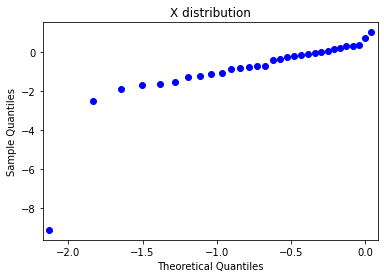


JanTemp


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


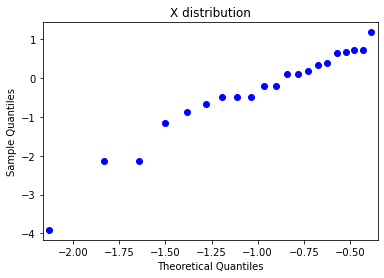

C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



JulyTemp


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


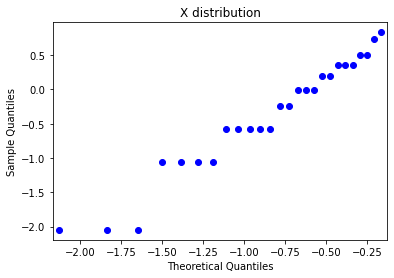

C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)



RelHum


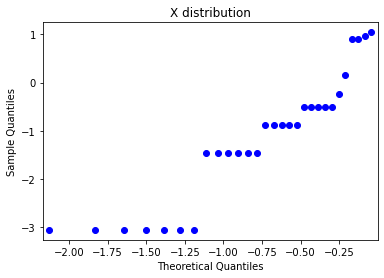

C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)



Rain


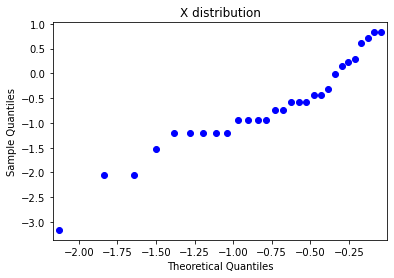


Educ


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


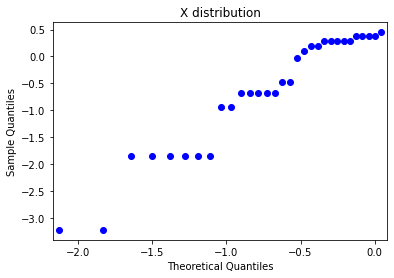


Dens


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


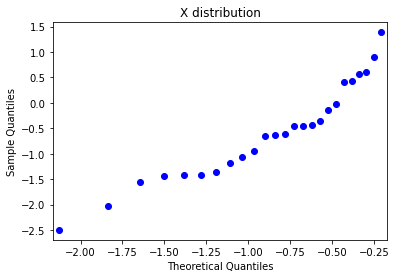


NonWhite


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


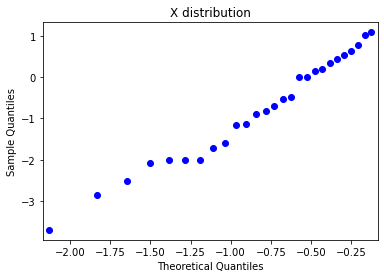


WhiteCollar


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


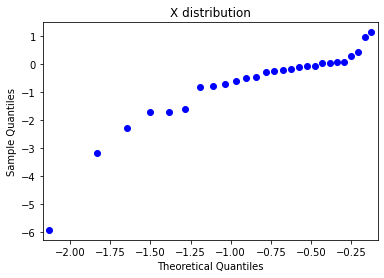


Pop


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


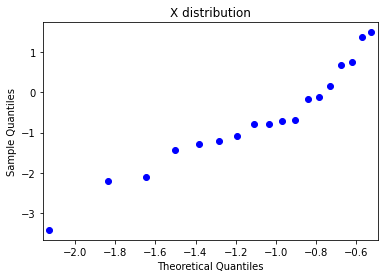


House


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


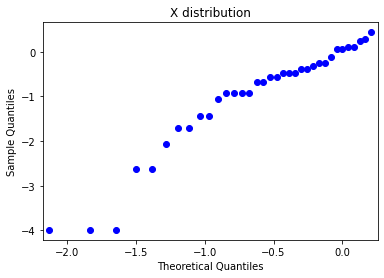


Income


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


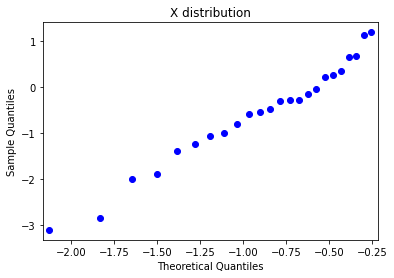


HC


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


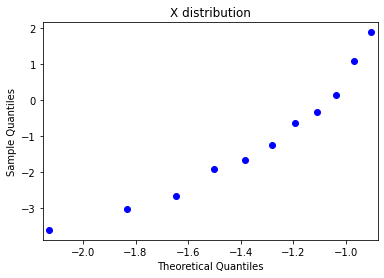

C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)



NOx


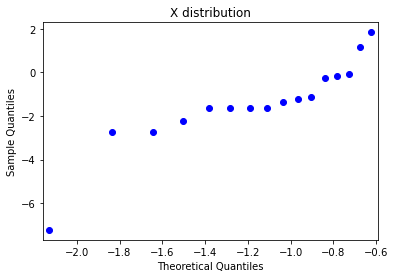

C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)



SO2


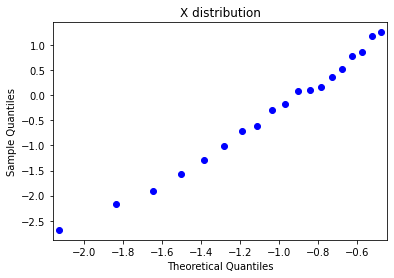

In [189]:
for field in m_fields:
    print(field)
    sm.qqplot(np.log(df[field]), line='s')
    plt.title("X distribution")
    plt.show()
    print("")